# SVM CLASSIFIER( LINEAR, POLY, SIGMOID )

**Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter. Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,which treat the candidate data sets as binary classification problems.**

#### Attribute Information:
Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency . The remaining four variables are similarly obtained from the DM-SNR curve . These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. class

#### Classification Label:  Class

# 1. DATA LOADING AND EXPLORATION

In [1]:
#importing libraries
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import tree

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score, classification_report,confusion_matrix, f1_score,make_scorer

import missingno as msno
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# SVM-LINEAR CLASSIFICATION ALGORITHM IMPLEMENTED FROM SCRATCH

In [2]:
#Own linear-SVM algorithm from scratch
class My_SVM_classifier():
    
    


    # initiating the hyperparameters
    def __init__(self, learning_rate=0.001, lambda_parameter=0.01, no_of_iterations=1000):

        self.learning_rate = learning_rate
        self.no_of_iterations = no_of_iterations
        self.lambda_parameter = lambda_parameter


    def getW(self):
        return self.w
    def getB(self):
        return self.b
    
    # fitting the dataset to SVM Classifier
    def fit(self, X, Y):

        # m  --> number of Data points --> number of rows
        # n  --> number of input features --> number of columns
        self.m, self.n = X.shape

        # initiating the weight value and bias value

        self.w = np.zeros(self.n)

        self.b = 0

        self.X = X

        self.Y = Y

        # implementing Gradient Descent algorithm for Optimization

        for i in range(self.no_of_iterations):
            self.update_weights()
            
        print(self.w, " ", self.b, "\n")



    # function for updating the weight and bias value
    def update_weights(self):

        # label encoding
        y_label = np.where(self.Y <= 0, -1, 1)



        # gradients ( dw, db)
        for index, x_i in enumerate(self.X):
            condition = y_label[index] * (np.dot(x_i, self.w) - self.b) >= 1
    
            if (condition == True):

                dw = 2 * self.lambda_parameter * self.w
                db = 0

            else:

                dw = 2 * self.lambda_parameter * self.w - np.dot(x_i, y_label[index])
                db = y_label[index]


            self.w = self.w - self.learning_rate * dw

            self.b = self.b - self.learning_rate * db



    # predict the label for a given input value
    def predict(self, X):

        output = np.dot(X, self.w) - self.b
    
        predicted_labels = np.sign(output)

        y_hat = np.where(predicted_labels <= -1, 0, 1)

        return y_hat
 




In [3]:
#for visualizing the hyperplane
class VisualizeSVM():
    def __init__(self, X, Y, w, b):
        self.X = X
        self.Y = Y
        self.w = w
        self.b = b
            
    def visualizeHyperplane(self):
            
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(self.X[:, 0], self.X[:, 1], marker="o", c=self.Y)

        x0_1 = np.amin(self.X[:, 0])
        x0_2 = np.amax(self.X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, self.w, self.b, 0)
        x1_2 = get_hyperplane_value(x0_2, self.w, self.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, self.w, self.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, self.w, self.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, self.w, self.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, self.w, self.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(self.X[:, 1])
        x1_max = np.amax(self.X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()




In [4]:
df=pd.read_csv('./pulsar_stars.csv')

In [5]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


# 2. DATA CLEANING

In [7]:
col_names = df.columns
col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [8]:
#We can see that there are leading spaces (spaces at the start of the string name) in the dataframe. So, I will remove these leading spaces.

df.columns = df.columns.str.strip()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Mean of the integrated profile                17898 non-null  float64
 1   Standard deviation of the integrated profile  17898 non-null  float64
 2   Excess kurtosis of the integrated profile     17898 non-null  float64
 3   Skewness of the integrated profile            17898 non-null  float64
 4   Mean of the DM-SNR curve                      17898 non-null  float64
 5   Standard deviation of the DM-SNR curve        17898 non-null  float64
 6   Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7   Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                  17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


<AxesSubplot:>

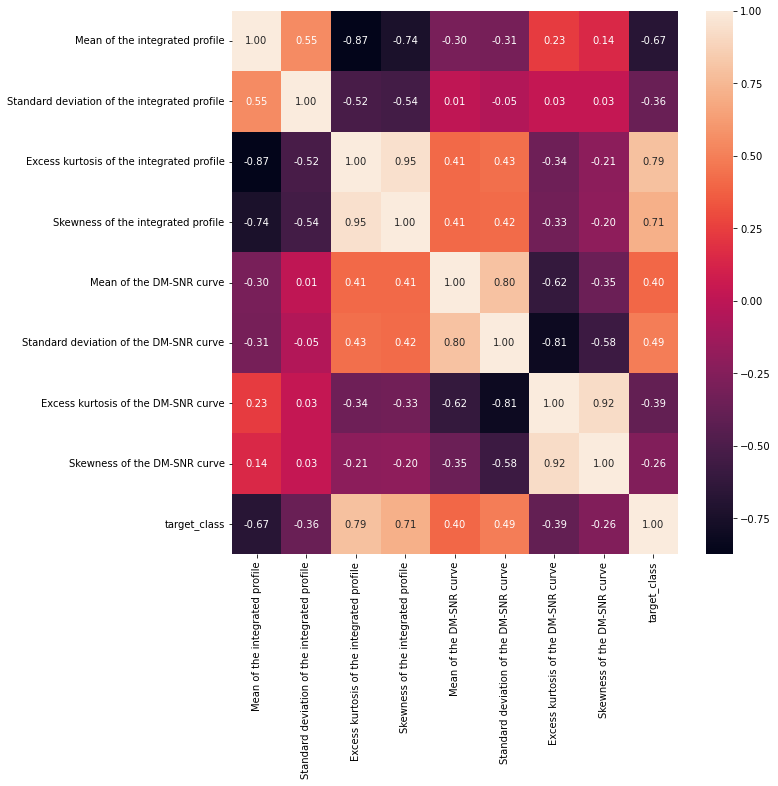

In [10]:
fig=plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='.2f')

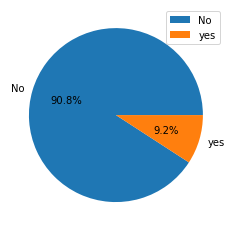

In [11]:
#Checking the % of the the targe_class

plt.pie(df['target_class'].value_counts(),autopct="%1.1f%%",labels=['No','yes'])
plt.legend();

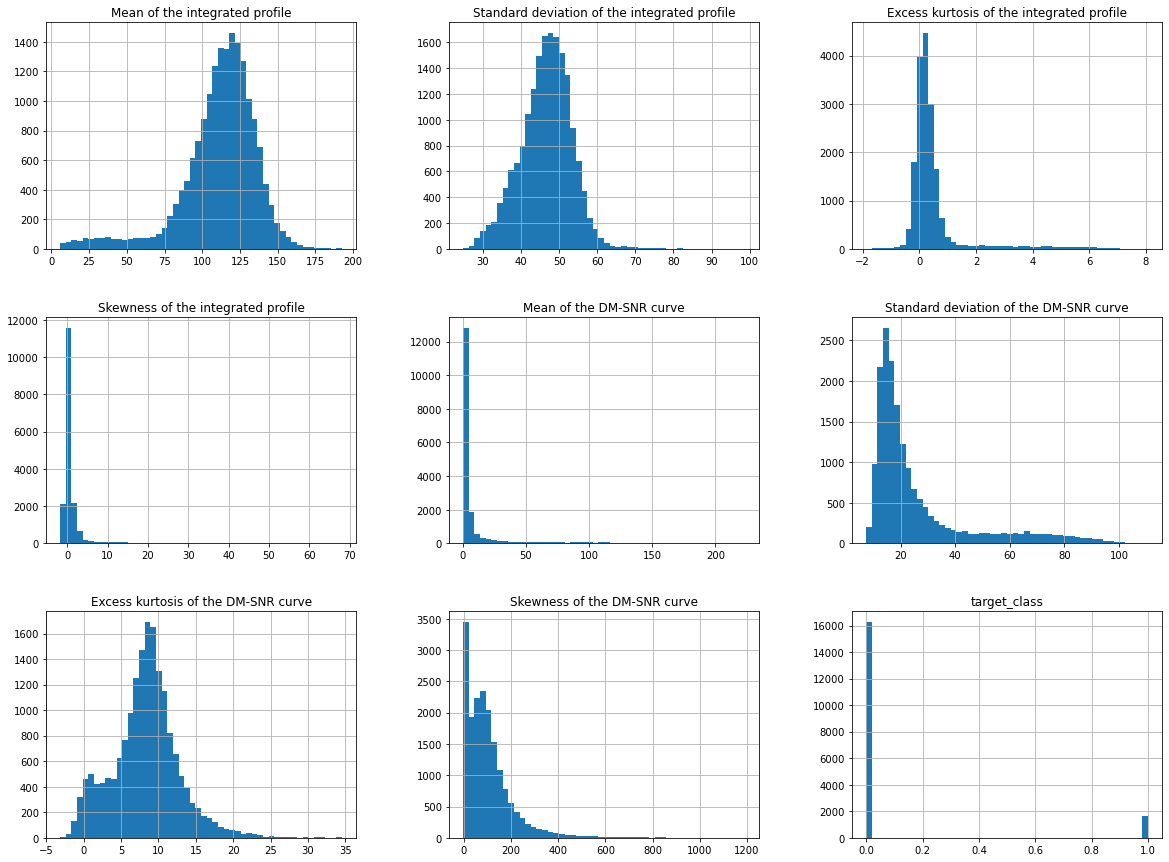

In [12]:
df.hist(bins=50, figsize=(20,15))
plt.show() 

### OUTLIERS analysis: 

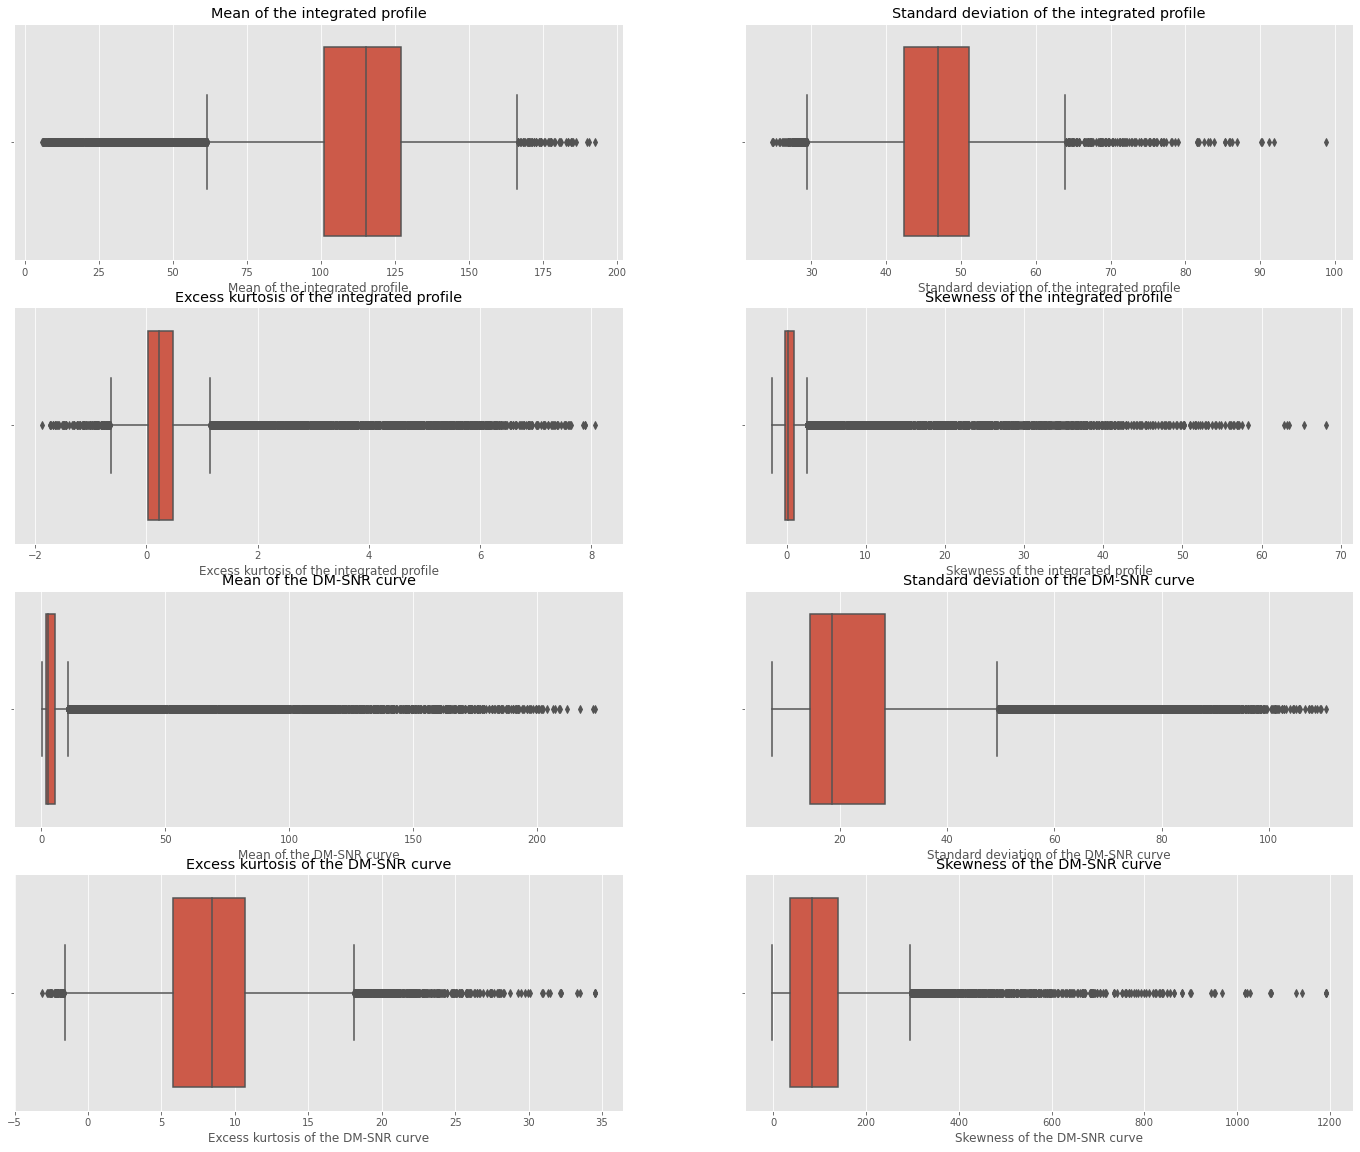

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(24,20))

col_names = df.columns[:-1]
for i,col in enumerate(col_names):
    plt.subplot(4,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(col)

*There are a lot pof outliers in our data*
#### Handle outliers with SVMs There are 2 variants of SVMs. They are hard-margin variant of SVM and soft-margin variant of SVM.

**The hard-margin variant of SVM does not deal with outliers. In this case, we want to find the hyperplane with maximum margin such that every training point is correctly classified with margin at least 1. This technique does not handle outliers well.**

**Another version of SVM is called soft-margin variant of SVM. In this case, we can have a few points incorrectly classified or classified with a margin less than 1. But for every such point, we have to pay a penalty in the form of C parameter, which controls the outliers. Low C implies we are allowing more outliers and high C implies less outliers.**

**The message is that since the dataset contains outliers, so the value of C should be high while training the model.**

In [2]:
df.isnull().sum()

NameError: name 'df' is not defined

In [15]:
df['target_class'].value_counts()

0    16259
1     1639
Name: target_class, dtype: int64

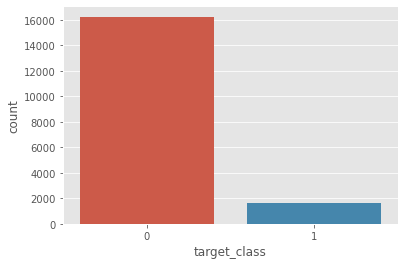

In [16]:
sns.countplot(x=df['target_class'])
plt.show()

In [17]:
x= df.drop(columns='target_class', axis=1)

y = df['target_class']

In [18]:
x.shape, y.shape

((17898, 8), (17898,))

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

### Feature scaling

In [20]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

## A) (i) LINEAR SVM MODEL  USING ALGORITHM IMPLEMENTED FROM SCRATCH

In [21]:
print("\nLINEAR SVM - ALGORITHM FROM SCRATCH!!!")
print("---------------------------------------")


C_values = [0.1, 10.0, 100.0, 1000.0]

for c in C_values:
    my_classifier = My_SVM_classifier(learning_rate=0.001, lambda_parameter=0.01, no_of_iterations=100)
    my_classifier.fit(x_train, y_train)
    y_pred=my_classifier.predict(x_test)
    
    print("\nC=", c)
    print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Precision = ",precision_score(y_test, y_pred))
    print("Recall = ",recall_score(y_test, y_pred),"\n")

    print(classification_report(y_pred,y_test))

    cm=metrics.confusion_matrix(y_test,y_pred)
    print("\nconfusion matrix: \n",cm)
    print("---------------------------------------")



LINEAR SVM - ALGORITHM FROM SCRATCH!!!
---------------------------------------
[-0.12769276  0.10828137  0.76165964  0.36030059 -0.13420155  0.18155098
 -0.10353578 -0.0605165 ]   1.313999999999966 


C= 0.1
Accuracy =  97.82 %
Precision =  0.9609375
Recall =  0.7834394904458599 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4986
           1       0.78      0.96      0.86       384

    accuracy                           0.98      5370
   macro avg       0.89      0.97      0.93      5370
weighted avg       0.98      0.98      0.98      5370


confusion matrix: 
 [[4884   15]
 [ 102  369]]
---------------------------------------
[-0.12769276  0.10828137  0.76165964  0.36030059 -0.13420155  0.18155098
 -0.10353578 -0.0605165 ]   1.313999999999966 


C= 10.0
Accuracy =  97.82 %
Precision =  0.9609375
Recall =  0.7834394904458599 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99

#  (ii) LINEAR-SVM using sklearn module


In [27]:
print("\nSVM kernel = LINEAR")
print("---------------------------------------")


C_values = [0.1, 10.0, 100.0, 1000.0]

for c in C_values:
    svm_linear = SVC(kernel='linear', C = c)
    svm_linear.fit(x_train, y_train)
    y_pred=svm_linear.predict(x_test)
    
    print("\nC=", c)
    print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Precision = ",precision_score(y_test, y_pred))
    print("Recall = ",recall_score(y_test, y_pred),"\n")

    print(classification_report(y_pred,y_test))

    cm=metrics.confusion_matrix(y_test,y_pred)
    print("\nconfusion matrix: \n",cm)
    print("---------------------------------------")



SVM kernel = LINEAR
---------------------------------------

C= 0.1
Accuracy =  98.1 %
Precision =  0.9424460431654677
Recall =  0.8343949044585988 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4953
           1       0.83      0.94      0.89       417

    accuracy                           0.98      5370
   macro avg       0.91      0.96      0.94      5370
weighted avg       0.98      0.98      0.98      5370


confusion matrix: 
 [[4875   24]
 [  78  393]]
---------------------------------------

C= 10.0
Accuracy =  98.16 %
Precision =  0.9325581395348838
Recall =  0.851380042462845 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4940
           1       0.85      0.93      0.89       430

    accuracy                           0.98      5370
   macro avg       0.92      0.96      0.94      5370
weighted avg       0.98      0.98      0.98      5370


confusion matri

# B) SVM KERNEL-POLYNOMIAL using sklearn module


In [28]:
print("SVM kernel = POLYNOMIAL")
print("---------------------------------------")


C_values = [0.1, 10.0, 100.0, 1000.0]

for c in C_values:
    svm_poly = SVC(kernel='poly', C = c)
    svm_poly.fit(x_train, y_train)
    y_pred=svm_poly.predict(x_test)
    
    print("\nC=", c)
    print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Precision = ",precision_score(y_test, y_pred))
    print("Recall = ",recall_score(y_test, y_pred),"\n")
    
    print(classification_report(y_pred,y_test))

    cm=metrics.confusion_matrix(y_test,y_pred)
    print("\nconfusion matrix: \n",cm)
    print("---------------------------------------")


SVM kernel = POLYNOMIAL
---------------------------------------

C= 0.1
Accuracy =  97.77 %
Precision =  0.95822454308094
Recall =  0.7791932059447984 

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4987
           1       0.78      0.96      0.86       383

    accuracy                           0.98      5370
   macro avg       0.89      0.97      0.92      5370
weighted avg       0.98      0.98      0.98      5370


confusion matrix: 
 [[4883   16]
 [ 104  367]]
---------------------------------------

C= 10.0
Accuracy =  98.04 %
Precision =  0.937799043062201
Recall =  0.832271762208068 

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4952
           1       0.83      0.94      0.88       418

    accuracy                           0.98      5370
   macro avg       0.91      0.96      0.94      5370
weighted avg       0.98      0.98      0.98      5370


confusion matr

## SIGMOID kernel-SIGMOID using sklearn module

In [ ]:
#Training the classifier model
#Predicting the test sample
#Checking with different values of C (hyperparameter)

print("SVM kernel = SIGMOID")
print("---------------------------------------")

C_values = [0.1, 10.0, 100.0, 1000.0]

for c in C_values:
    svm_sigmoid = SVC(kernel='sigmoid', C = c)
    svm_sigmoid.fit(x_train, y_train)
    y_pred=svm_sigmoid.predict(x_test)

    
    print("\nC=", c)
    print("Accuracy = ", round(accuracy_score(y_test, y_pred)*100, 2), "%")
    print("Precision = ",precision_score(y_test, y_pred))
    print("Recall = ",recall_score(y_test, y_pred),"\n")

    print(classification_report(y_pred,y_test))

    cm=metrics.confusion_matrix(y_test,y_pred)
    print("\nconfusion matrix: \n",cm)
    print("---------------------------------------")


## 4. EVALUATE THE PERFORMANCE OF THE ALGORITHMS:

## COMPARISON OF PERFORMANCE OF BOTH IMPLEMENTATION:

### (i) SVM-linear from scratch:
#### from scratch
*c = 100.0*
1. Accuracy =  97.82 %
2. Precision =  0.9609375
3. Recall =  0.7834394904458599 

#### using sklearn module:
*C = 100.0*
1. Accuracy =  98.16 %
2. Precision =  0.9325581395348838
3. Recall =  0.851380042462845 



### (i) SVM-poly from scratch:
*C = 1000.0*
1. Accuracy =  98.16 %
2. Precision =  0.9366197183098591
3. Recall =  0.8471337579617835 

### (i) SVM-sigmoid from scratch:
*C = 0.1*
1. Accuracy =  87.52 %
2. Precision =  0.28874734607218683
3. Recall =  0.28874734607218683 

 